In [348]:
import pandas as pd
orders = pd.read_csv('List of Orders.csv')
details = pd.read_csv('Order Details.csv')
targets = pd.read_csv('Sales target.csv')
print(orders.head())
print(details.head())
print(targets.head())


  Order ID  Order Date CustomerName           State       City
0  B-25601  01-04-2018       Bharat         Gujarat  Ahmedabad
1  B-25602  01-04-2018        Pearl     Maharashtra       Pune
2  B-25603  03-04-2018        Jahan  Madhya Pradesh     Bhopal
3  B-25604  03-04-2018       Divsha       Rajasthan     Jaipur
4  B-25605  05-04-2018      Kasheen     West Bengal    Kolkata
  Order ID  Amount  Profit  Quantity     Category      Sub-Category
0  B-25601  1275.0 -1148.0         7    Furniture         Bookcases
1  B-25601    66.0   -12.0         5     Clothing             Stole
2  B-25601     8.0    -2.0         3     Clothing       Hankerchief
3  B-25601    80.0   -56.0         4  Electronics  Electronic Games
4  B-25602   168.0  -111.0         2  Electronics            Phones
  Month of Order Date   Category   Target
0              Apr-18  Furniture  10400.0
1              May-18  Furniture  10500.0
2              Jun-18  Furniture  10600.0
3              Jul-18  Furniture  10800.0
4   

In [349]:
!pip install psycopg2-binary

In [ ]:
import psycopg2
# Replace with your actual PostgreSQL credentials
conn = psycopg2.connect(
dbname='E-Commerce-Data-Analysis-PostgreSQL-psycopg2-and-JupyterLab',
user='postgres',
password='change', # Change this!
host='localhost',
port='5432')
cur = conn.cursor()
print("✅ Connected to the database!")

✅ Connected to the database!


In [351]:
import csv
from datetime import datetime
def empty_to_none(row):
    return [r if r != "" else None for r in row]
def fix_date(date_str):
    try:
        return datetime.strptime(date_str, '%d-%m-%Y').strftime('%Y-%m-%d')
    except Exception:
        return date_str
with open('List of Orders.csv', 'r') as f:
    next(f)
    reader = csv.reader(f)
    for raw_row in reader:
        row = empty_to_none(raw_row)
        if row[1] is not None:
            row[1] = fix_date(row[1])
        # SKIP rows that have None as Order ID (first column)
        if row[0] is not None:
            cur.execute("""
                INSERT INTO list_of_orders (
                    "Order ID", "Order Date", CustomerName, State, City
                ) VALUES (%s, %s, %s, %s, %s)
                ON CONFLICT ("Order ID") DO NOTHING;
            """, row)
conn.commit()
print("✅ List_of_Orders.csv data imported successfully!")


✅ List_of_Orders.csv data imported successfully!


In [352]:
conn.rollback()

In [353]:
cur.execute("""
CREATE TABLE IF NOT EXISTS List_of_Orders (
    "Order ID" VARCHAR(50) PRIMARY KEY,
    "Order Date" DATE,
    CustomerName VARCHAR(100),
    State VARCHAR(50),
    City VARCHAR(50)
);
""")
conn.commit()
print("✅ Table created!")



✅ Table created!


In [354]:
cur.execute("""
            SELECT * 
            FROM List_of_Orders;""")
rows = cur.fetchall()
for row in rows:
    print(row)

('B-25601', datetime.date(2018, 4, 1), 'Bharat', 'Gujarat', 'Ahmedabad')
('B-25602', datetime.date(2018, 4, 1), 'Pearl', 'Maharashtra', 'Pune')
('B-25603', datetime.date(2018, 4, 3), 'Jahan', 'Madhya Pradesh', 'Bhopal')
('B-25604', datetime.date(2018, 4, 3), 'Divsha', 'Rajasthan', 'Jaipur')
('B-25605', datetime.date(2018, 4, 5), 'Kasheen', 'West Bengal', 'Kolkata')
('B-25606', datetime.date(2018, 4, 6), 'Hazel', 'Karnataka', 'Bangalore')
('B-25607', datetime.date(2018, 4, 6), 'Sonakshi', 'Jammu and Kashmir', 'Kashmir')
('B-25608', datetime.date(2018, 4, 8), 'Aarushi', 'Tamil Nadu', 'Chennai')
('B-25609', datetime.date(2018, 4, 9), 'Jitesh', 'Uttar Pradesh', 'Lucknow')
('B-25610', datetime.date(2018, 4, 9), 'Yogesh', 'Bihar', 'Patna')
('B-25611', datetime.date(2018, 4, 11), 'Anita', 'Kerala ', 'Thiruvananthapuram')
('B-25612', datetime.date(2018, 4, 12), 'Shrichand', 'Punjab', 'Chandigarh')
('B-25613', datetime.date(2018, 4, 12), 'Mukesh', 'Haryana', 'Chandigarh')
('B-25614', datetime.d

In [355]:
cur.execute("""
CREATE TABLE IF NOT EXISTS order_details (
    "Order ID" TEXT PRIMARY KEY,
    "Amount" NUMERIC,
    "Profit" NUMERIC,
    "Quantity" INTEGER,
    "Category" TEXT,
    "Sub-Category" TEXT
);
""")
conn.commit()
print("✅ Order Details table created!")

✅ Order Details table created!


In [356]:
cur.execute("""
CREATE TABLE IF NOT EXISTS sales_target (
    "Month of Order Date" TEXT,
    "Category" TEXT,
    "Target" NUMERIC
);
""")
conn.commit()
print("✅ Sales target table created!")

✅ Sales target table created!


In [357]:
conn.rollback()

In [359]:
import csv
from datetime import datetime
def empty_to_none(row):
    return [r if r != "" else None for r in row]
def fix_date(date_str):
    try:
        return datetime.strptime(date_str, '%d-%m-%Y').strftime('%Y-%m-%d')
    except Exception:
        return date_str
with open('List of Orders.csv', 'r') as f:
    next(f)
    reader = csv.reader(f)
    for raw_row in reader:
        row = empty_to_none(raw_row)
        if row[1] is not None:
            row[1] = fix_date(row[1])
        # SKIP rows that have None as Order ID (first column)
        if row[0] is not None:
            cur.execute("""
                INSERT INTO list_of_orders (
                    "Order ID", "Order Date", CustomerName, State, City
                ) VALUES (%s, %s, %s, %s, %s)
                ON CONFLICT ("Order ID") DO NOTHING;
            """, row)
conn.commit()
print("✅ List_of_Orders.csv data imported successfully!")

✅ List_of_Orders.csv data imported successfully!


In [ ]:
import csv

def empty_to_none(row):
    return [r if r != "" else None for r in row]

with open('Order Details.csv', 'r') as f:
    next(f)  # skip header
    reader = csv.reader(f)
    for raw_row in reader:
        row = empty_to_none(raw_row)

        # Skip rows with None as Order ID (first column required)
        if row[0] is not None:
            cur.execute("""
                INSERT INTO order_details (
                    "Order ID", "Amount", "Profit", "Quantity", "Category", "Sub-Category"
                ) VALUES (%s, %s, %s, %s, %s, %s)
                ON CONFLICT ("Order ID") DO NOTHING;
            """, row)

conn.commit()
print("✅ Order Details.csv data imported!")


✅ Order Details.csv data imported!


In [ ]:
import csv

def empty_to_none(row):
    return [r if r != "" else None for r in row]

with open('Sales target.csv', 'r') as f:
    next(f)  # Skip header row
    reader = csv.reader(f)
    for raw_row in reader:
        row = empty_to_none(raw_row)
        cur.execute("""
            INSERT INTO sales_target (
                "Month of Order Date", "Category", "Target"
            ) VALUES (%s, %s, %s)
            ON CONFLICT DO NOTHING;
        """, row)

conn.commit()
print("✅ Sales target CSV data imported!")


✅ Sales target CSV data imported!


In [ ]:
import pandas as pd

cur.execute("SELECT * FROM order_details;")  
rows = cur.fetchall()

# Get column names automatically from cursor
colnames = [desc[0] for desc in cur.description]

df = pd.DataFrame(rows, columns=colnames)

print(df)

    Order ID   Amount    Profit  Quantity     Category Sub-Category
0    B-25601  1275.00  -1148.00         7    Furniture    Bookcases
1    B-25602   168.00   -111.00         2  Electronics       Phones
2    B-25603  1355.00    -60.00         5     Clothing     Trousers
3    B-25604    65.00     17.00         2     Clothing      T-shirt
4    B-25605    75.00      0.00         7     Clothing        Saree
..       ...      ...       ...       ...          ...          ...
495  B-26096    45.00      9.00         3     Clothing     Leggings
496  B-26097    97.00     12.00         2     Clothing  Hankerchief
497  B-26098    82.00      8.00         3  Electronics  Accessories
498  B-26099     9.00      3.00         1     Clothing        Skirt
499  B-26100   828.00    230.00         2    Furniture       Chairs

[500 rows x 6 columns]


In [ ]:
import pandas as pd

cur.execute("SELECT * FROM sales_target ;")  
rows = cur.fetchall()

# Get column names automatically from cursor
colnames = [desc[0] for desc in cur.description]

df = pd.DataFrame(rows, columns=colnames)

print(df)

    Month of Order Date     Category    Target
0                Apr-18    Furniture  10400.00
1                May-18    Furniture  10500.00
2                Jun-18    Furniture  10600.00
3                Jul-18    Furniture  10800.00
4                Aug-18    Furniture  10900.00
..                  ...          ...       ...
247              Nov-18  Electronics   9000.00
248              Dec-18  Electronics   9000.00
249              Jan-19  Electronics  16000.00
250              Feb-19  Electronics  16000.00
251              Mar-19  Electronics  16000.00

[252 rows x 3 columns]


6. Category/Region Performance

In [ ]:
import pandas as pd
import sqlite3

# Load CSVs
df_orders = pd.read_csv('List_of_Orders.csv')
df_details = pd.read_csv('Order Details.csv')

conn = sqlite3.connect(':memory:')
df_orders.to_sql('orders', conn, index=False, if_exists='replace')
df_details.to_sql('details', conn, index=False, if_exists='replace')


1500

In [ ]:
sql_catregion = """
SELECT d.Category, o.State, SUM(d.Amount) AS Sales
FROM details d
JOIN orders o ON d."Order ID" = o."Order ID"
GROUP BY d.Category, o.State
ORDER BY d.Category, Sales DESC;
"""
catregion_sales = pd.read_sql_query(sql_catregion, conn)
print(catregion_sales)


       Category              State    Sales
0      Clothing     Madhya Pradesh  30566.0
1      Clothing        Maharashtra  28542.0
2      Clothing             Punjab   8419.0
3      Clothing      Uttar Pradesh   8208.0
4      Clothing            Gujarat   7759.0
5      Clothing          Rajasthan   6440.0
6      Clothing        West Bengal   6392.0
7      Clothing            Kerala    6360.0
8      Clothing              Delhi   5884.0
9      Clothing          Karnataka   5073.0
10     Clothing           Nagaland   4050.0
11     Clothing  Jammu and Kashmir   3483.0
12     Clothing     Andhra Pradesh   3244.0
13     Clothing             Sikkim   3139.0
14     Clothing              Bihar   2963.0
15     Clothing            Haryana   2854.0
16     Clothing                Goa   2385.0
17     Clothing         Tamil Nadu   1956.0
18     Clothing   Himachal Pradesh   1337.0
19  Electronics        Maharashtra  42493.0
20  Electronics     Madhya Pradesh  40529.0
21  Electronics      Uttar Prade

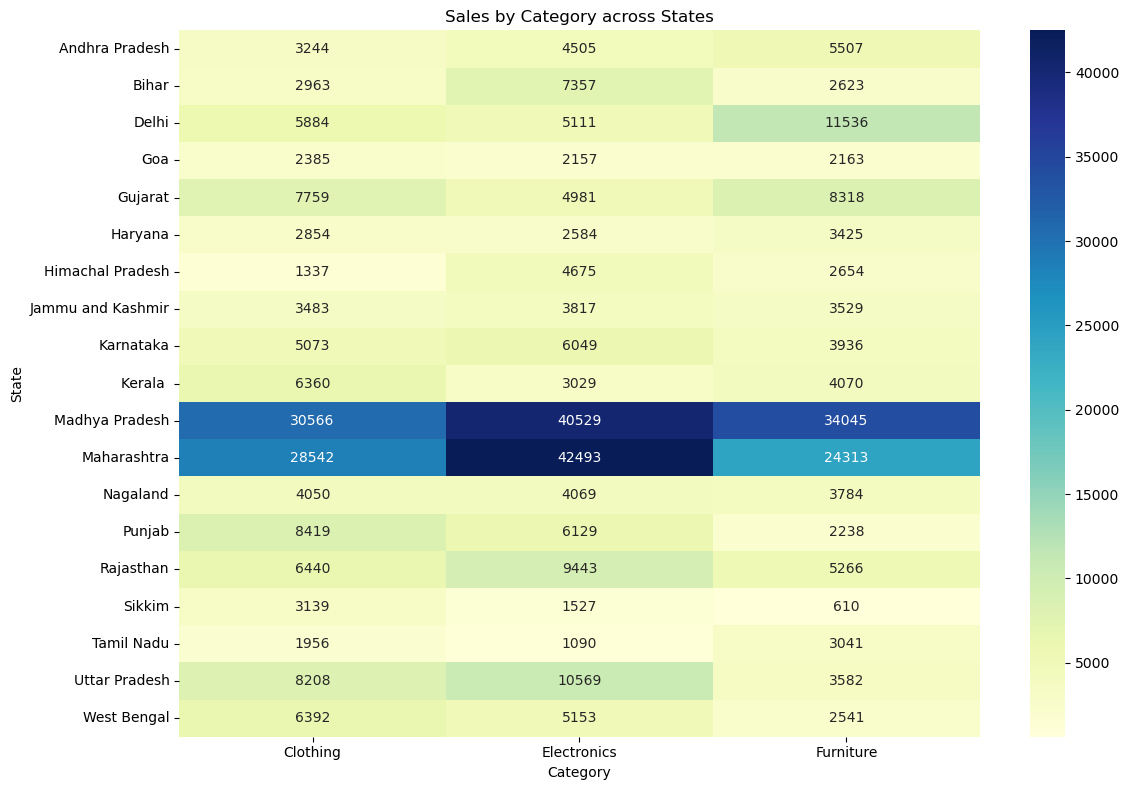

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot to category as columns, state as rows
pivot = catregion_sales.pivot(index="State", columns="Category", values="Sales")

plt.figure(figsize=(12,8))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Sales by Category across States")
plt.xlabel("Category")
plt.ylabel("State")
plt.tight_layout()
plt.show()


7. Sub-Category Trends

In [ ]:
sql_subcat = '''
SELECT Category, "Sub-Category", SUM(Amount) AS Total_Sales
FROM details
GROUP BY Category, "Sub-Category"
ORDER BY Category, Total_Sales DESC;
'''
subcat_sales = pd.read_sql_query(sql_subcat, conn)
print(subcat_sales)



       Category      Sub-Category  Total_Sales
0      Clothing             Saree      53511.0
1      Clothing          Trousers      30039.0
2      Clothing             Stole      18546.0
3      Clothing       Hankerchief      14608.0
4      Clothing             Shirt       7555.0
5      Clothing           T-shirt       7382.0
6      Clothing             Kurti       3361.0
7      Clothing          Leggings       2106.0
8      Clothing             Skirt       1946.0
9   Electronics          Printers      58252.0
10  Electronics            Phones      46119.0
11  Electronics  Electronic Games      39168.0
12  Electronics       Accessories      21728.0
13    Furniture         Bookcases      56861.0
14    Furniture            Chairs      34222.0
15    Furniture            Tables      22614.0
16    Furniture       Furnishings      13484.0


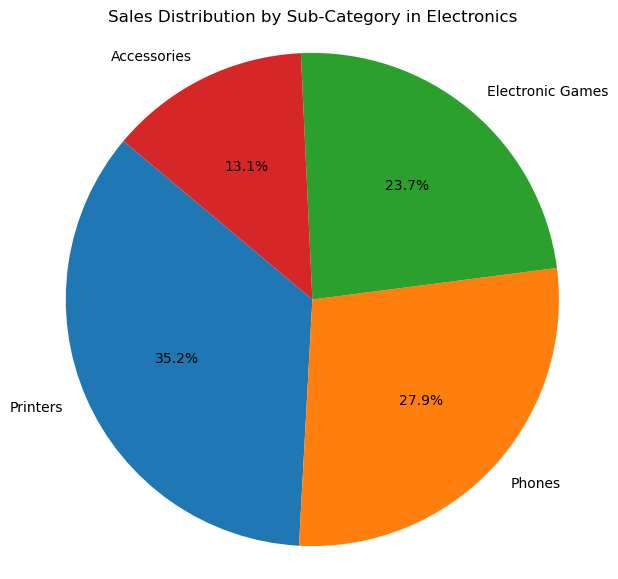

In [ ]:
import matplotlib.pyplot as plt

category = 'Electronics'  # Change to any category you want
data = subcat_sales[subcat_sales['Category'] == category]

plt.figure(figsize=(7,7))
plt.pie(data['Total_Sales'], labels=data['Sub-Category'], autopct='%1.1f%%', startangle=140)
plt.title(f'Sales Distribution by Sub-Category in {category}')
plt.axis('equal')
plt.show()


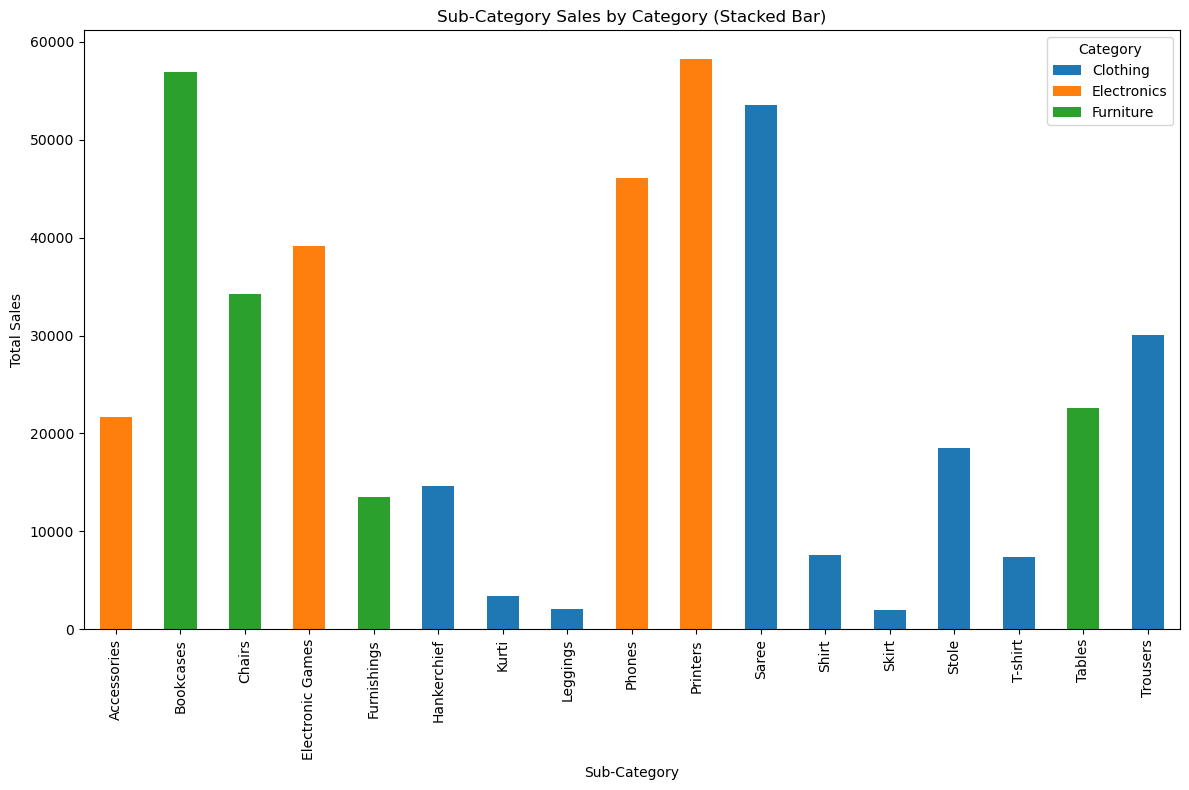

In [ ]:
bar_data = subcat_sales.pivot(index='Sub-Category', columns='Category', values='Total_Sales').fillna(0)

bar_data.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Sub-Category Sales by Category (Stacked Bar)')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()
